17:57:08 - cmdstanpy - INFO - Chain [1] start processing
17:57:08 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0   2021-08-06  521.850706  544.638783   640.690522   521.850706   521.850706   
1   2021-08-09  525.352771  562.458722   656.745053   525.352771   525.352771   
2   2021-08-10  526.520126  555.804330   654.880888   526.520126   526.520126   
3   2021-08-11  527.687481  559.568756   656.482525   527.687481   527.687481   
4   2021-08-12  528.854835  553.255652   645.402199   528.854835   528.854835   
..         ...         ...         ...          ...          ...          ...   
247 2022-07-25  744.949796  637.757205   923.684231   592.880337   875.680261   
248 2022-07-26  750.622093  639.762734   947.621441   586.739916   898.732692   
249 2022-07-27  756.294390  628.647405   973.400750   576.217431   927.100342   
250 2022-07-28  761.966687  619.449797  1003.671523   568.327538   943.815451   
251 2022-07-29  767.638984  624.976080  1035.826281   562.809852   971.885661   

     additive_terms  additi

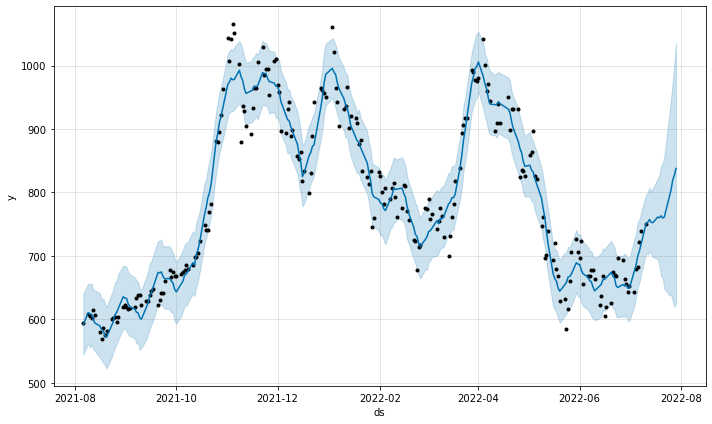

In [9]:
from prophet import Prophet
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

data = pd.read_csv('data.csv')

# {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.01
m = Prophet(growth="linear", changepoint_range=0.99, changepoint_prior_scale=5, holidays_prior_scale=0.01, seasonality_prior_scale=1.0, interval_width=0.9, daily_seasonality=True).add_seasonality(name='monthly', period=21, fourier_order=3).fit(data)
future = m.make_future_dataframe(periods=20)

# Eliminate weekend from future dataframe
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]

forecast = m.predict(future)
print(forecast)
fig = m.plot(forecast)




In [10]:
#df = forecast["yhat", "ds"]
df = (forecast.loc[:, ["yhat", "ds"]]).iloc[-1:]
print(df)

           yhat         ds
251  837.723738 2022-07-29


In [3]:
yhat_future = df["yhat"]
print(yhat_future)

251    785.695352
Name: yhat, dtype: float64


In [25]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='180 days', period='45 days', horizon = '90 days')
df_cv.tail()


  0%|                                                     | 0/2 [00:00<?, ?it/s]11:13:24 - cmdstanpy - INFO - Chain [1] start processing
11:13:24 - cmdstanpy - INFO - Chain [1] done processing
 50%|██████████████████████▌                      | 1/2 [00:00<00:00,  1.39it/s]11:13:25 - cmdstanpy - INFO - Chain [1] start processing
11:13:25 - cmdstanpy - INFO - Chain [1] done processing
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.19it/s]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
120,2022-07-05,1341.328545,1025.380759,1656.070052,680,2022-04-12
121,2022-07-06,1355.800148,1036.481923,1663.316585,682,2022-04-12
122,2022-07-07,1358.764559,1040.495412,1676.734923,722,2022-04-12
123,2022-07-08,1362.898780,1041.452848,1678.254873,739,2022-04-12
124,2022-07-11,1391.145296,1055.402333,1739.696730,750,2022-04-12


In [1]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()
df_p.tail()


ModuleNotFoundError: No module named 'prophet'